# Social Media Sentiment Analysis

This notebook performs sentiment analysis on social media data to understand public opinion and attitudes towards specific topics or brands.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import nltk
from wordcloud import WordCloud
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
sns.set_palette("husl")

## 1. Data Loading and Preprocessing

In [2]:
# Load the dataset
df = pd.read_csv('../data/twitter_entity_sentiment.csv')

# Display basic information about the dataset
print("Dataset Info:")
df.info()

print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   10 non-null     int64 
 1   text       10 non-null     object
 2   entity     10 non-null     object
 3   sentiment  10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes

First few rows:


,tweet_id,text,entity,sentiment
0,1,I absolutely love the new iPhone 15 Pro camera...,iPhone 15 Pro,positive
1,2,The battery life on this Samsung S24 is disapp...,Samsung S24,negative
2,3,Tesla's autopilot system keeps getting better ...,Tesla,positive
3,4,"Netflix's new show is just okay, nothing special",Netflix,neutral
4,5,Google's AI capabilities are truly revolutionary,Google,positive


## 2. Text Preprocessing Functions

In [7]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove user mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    
    return text.strip()

# Apply text cleaning
df['cleaned_text'] = df['text'].apply(clean_text)

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


## 3. Sentiment Analysis

In [4]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Calculate sentiment scores
df['sentiment_score'] = df['cleaned_text'].apply(get_sentiment)

# Categorize sentiment
df['sentiment_category'] = pd.cut(df['sentiment_score'],
                                 bins=[-1, -0.1, 0.1, 1],
                                 labels=['Negative', 'Neutral', 'Positive'])

## 4. Visualization

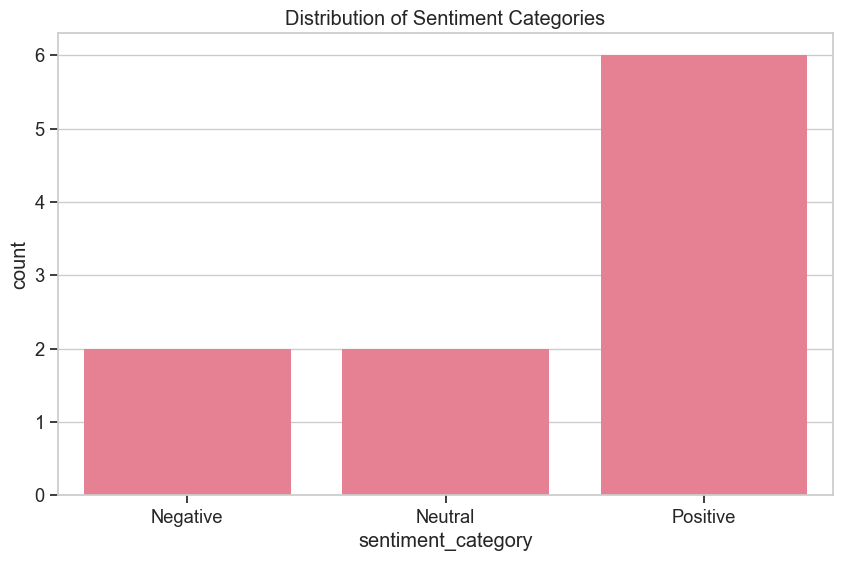

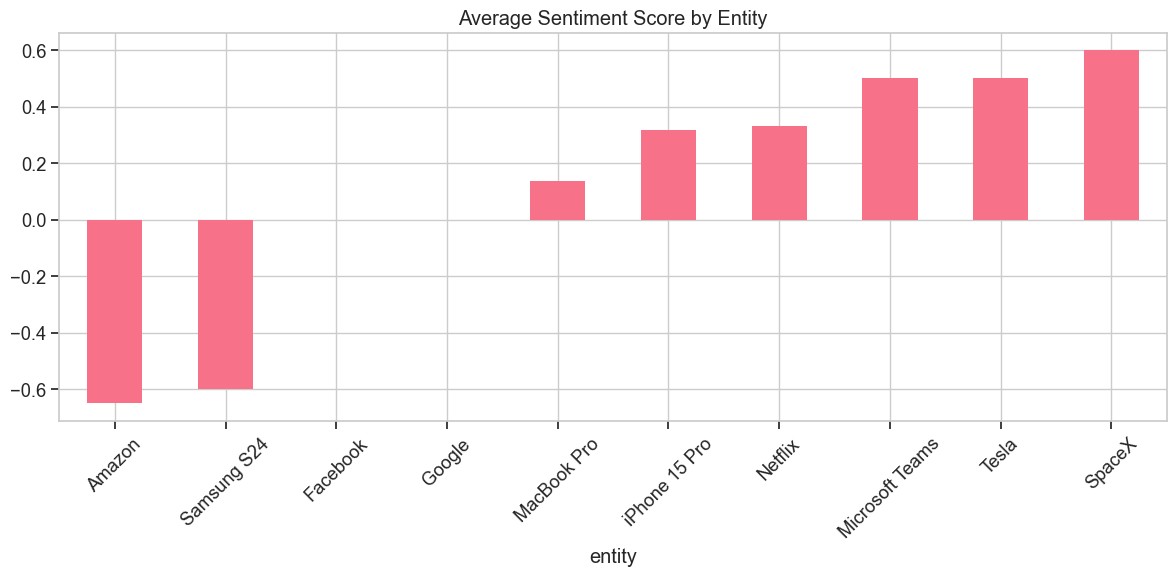

In [5]:
# 1. Overall Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_category')
plt.title('Distribution of Sentiment Categories')
plt.show()

# 2. Sentiment Distribution by Entity
entity_sentiment = df.groupby('entity')['sentiment_score'].mean().sort_values()
plt.figure(figsize=(12, 6))
entity_sentiment.plot(kind='bar')
plt.title('Average Sentiment Score by Entity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5. Word Cloud Generation

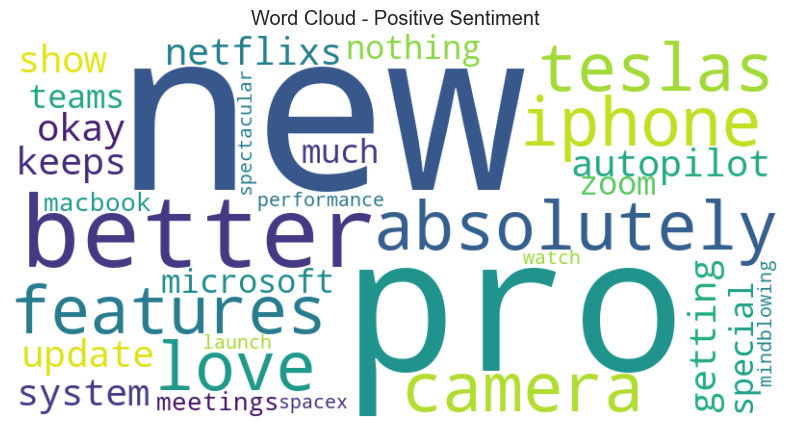

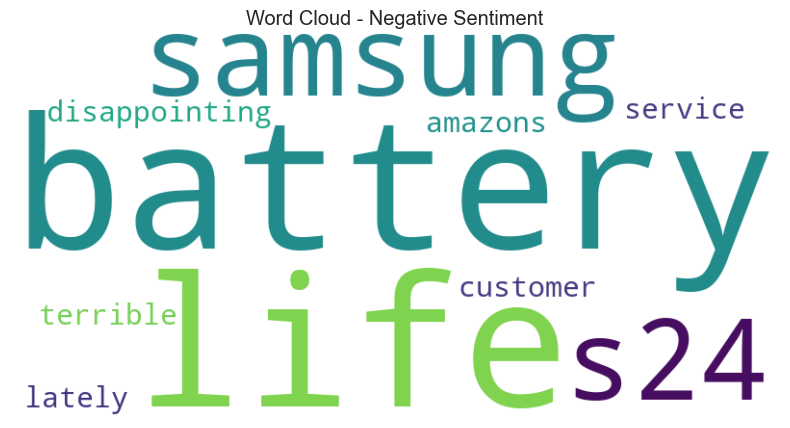

In [6]:
# Generate word cloud for positive sentiment
positive_text = ' '.join(df[df['sentiment_score'] > 0]['cleaned_text'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Sentiment')
plt.show()

# Generate word cloud for negative sentiment
negative_text = ' '.join(df[df['sentiment_score'] < 0]['cleaned_text'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Sentiment')
plt.show()

## 6. Interactive Visualizations with Plotly

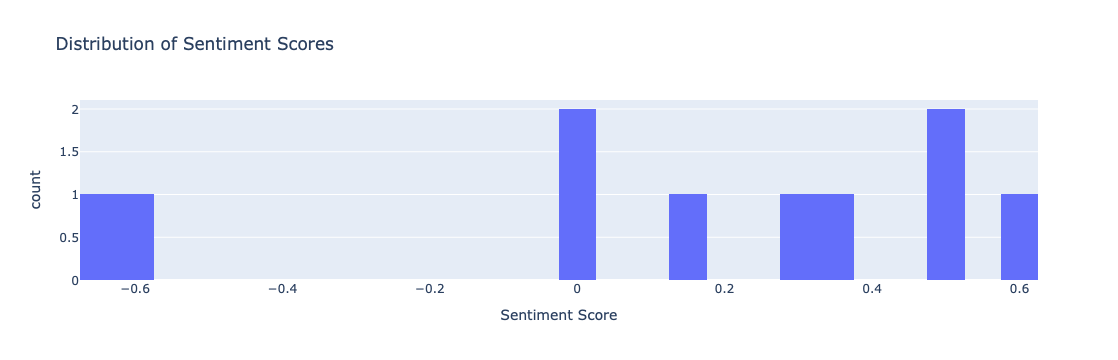

ValueError: All arguments should have the same length. The length of column argument `df[text]` is 10, whereas the length of  previously-processed arguments ['x', 'y'] is 2

In [8]:
# Create interactive sentiment distribution plot
fig = px.histogram(df, x='sentiment_score', nbins=50,
                  title='Distribution of Sentiment Scores',
                  labels={'sentiment_score': 'Sentiment Score', 'count': 'Frequency'})
fig.show()

# Create interactive entity sentiment plot
entity_sentiment_df = df.groupby('entity').agg({
    'sentiment_score': ['mean', 'count']
}).reset_index()

fig = px.scatter(entity_sentiment_df, 
                x=('sentiment_score', 'mean'),
                y=('sentiment_score', 'count'),
                text='entity',
                title='Entity Sentiment Analysis',
                labels={'sentiment_score': 'Average Sentiment Score',
                       'count': 'Number of Mentions'})
fig.show()